In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import plotly.express as px
import pandas as pd

In [31]:
df = pd.read_csv("data/1950-2019_all_tornadoes.csv")
df

om    yr  mo  dy        date      time  tz  st  stf  stn  ...  \
0           1  1950   1   3  1950-01-03  11:00:00   3  MO   29    1  ...   
1           1  1950   1   3  1950-01-03  11:00:00   3  MO   29    1  ...   
2           1  1950   1   3  1950-01-03  11:10:00   3  IL   17    1  ...   
3           2  1950   1   3  1950-01-03  11:55:00   3  IL   17    2  ...   
4           3  1950   1   3  1950-01-03  16:00:00   3  OH   39    1  ...   
...       ...   ...  ..  ..         ...       ...  ..  ..  ...  ...  ...   
66383  618537  2019  12  29  2019-12-29  16:03:00   3  MS   28    0  ...   
66384  618538  2019  12  29  2019-12-29  16:13:00   3  MS   28    0  ...   
66385  618539  2019  12  29  2019-12-29  16:32:00   3  MS   28    0  ...   
66386  618540  2019  12  29  2019-12-29  17:13:00   3  MS   28    0  ...   
66387  618541  2019  12  29  2019-12-29  18:50:00   3  AL    1    0  ...   

        len  wid  ns  sn  sg   f1  f2  f3  f4  fc  
0      9.50  150   2   0   1    0   0   0   0   0  
1      6.20  150   2   1   2  189   0   0   0   0  
2      3.30  100   2   1   2  119   0   0   0   0  
3      3.60  130   1   1   1  135   0   0   0   0  
4      0.10   10   1   1   1  161   0   0   0   0  
...     ...  ...  ..  ..  ..  ...  ..  ..  ..  ..  
66383  7.70  900   1   1   1    7   0   0   0   0  
66384  3.82  200   1   1   1   19   0   0   0   0  
66385  2.61  200   1   1   1  105   0   0   0   0  
66386  3.23  125   1   1   1  101   0   0   0   0  
66387  5.07   50   1   1   1   83   0   0   0   0  

[66388 rows x 29 columns]

In [32]:
df['group'] = df['st']

In [37]:
df['group']=df['group'].replace({
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
})

KeyError: 'group'

In [38]:
df1 = df[[
'yr',
'mo',
'date',
'st',
'mag',
'inj',
'fat',
'loss',
'closs',
'len',
'wid',
'slat',
'slon',
'group']]
df1.head()

KeyError: "['date', 'inj', 'mo', 'fat', 'loss', 'closs', 'yr', 'wid', 'group', 'len', 'mag', 'slon', 'slat'] not in index"

In [39]:
data = {'StName':['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']}

df = pd.DataFrame(data)
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'

states = pd.read_html(cw_location + cw_filename)[0]
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
df['StAbbr'] = df['StName'].map(state_code_map)
code_state_map = dict(zip(states['Code'],
                          states['Description']))
df['StNameAgain'] = df['StAbbr'].map(code_state_map)
df
df = df.rename(columns={'stName': 'State_Name', 'StAbbr': 'st'})
df.head()

StName  st StNameAgain
0     Alabama  AL     Alabama
1      Alaska  AK      Alaska
2     Arizona  AZ     Arizona
3    Arkansas  AR    Arkansas
4  California  CA  California

In [40]:
new_df2 = pd.merge(df1, df, on='st', how='left')
new_df2
df3 = new_df2[[
'yr',
'mo',
'date',
'st',
'StName',
'mag',
'inj',
'fat',
'loss',
'closs',
'len',
'wid',
'slat',
'slon',
'group']]
df3

yr  mo        date  st       StName  mag  inj  fat      loss  closs  \
0      1950   1  1950-01-03  MO     Missouri    3    3    0       6.0    0.0   
1      1950   1  1950-01-03  MO     Missouri    3    3    0       6.0    0.0   
2      1950   1  1950-01-03  IL     Illinois    3    0    0       5.0    0.0   
3      1950   1  1950-01-03  IL     Illinois    3    3    0       5.0    0.0   
4      1950   1  1950-01-03  OH         Ohio    1    1    0       4.0    0.0   
...     ...  ..         ...  ..          ...  ...  ...  ...       ...    ...   
66383  2019  12  2019-12-29  MS  Mississippi    1    0    0   75000.0    0.0   
66384  2019  12  2019-12-29  MS  Mississippi    1    0    0   10000.0    0.0   
66385  2019  12  2019-12-29  MS  Mississippi    0    0    0    5000.0    0.0   
66386  2019  12  2019-12-29  MS  Mississippi    1    0    0  150000.0    0.0   
66387  2019  12  2019-12-29  AL      Alabama    0    0    0       0.0    0.0   

        len  wid     slat     slon group  
0      9.50  150  38.7700 -90.2200     M  
1      6.20  150  38.7700 -90.2200     M  
2      3.30  100  38.8200 -90.1200     M  
3      3.60  130  39.1000 -89.3000     M  
4      0.10   10  40.8800 -84.5800     M  
...     ...  ...      ...      ...   ...  
66383  7.70  900  33.1628 -89.4323     S  
66384  3.82  200  33.2598 -89.2778     S  
66385  2.61  200  33.4720 -89.0315     S  
66386  3.23  125  32.5268 -89.1628     S  
66387  5.07   50  34.7541 -87.0777     S  

[66388 rows x 15 columns]

In [41]:
df3 = df3.rename(columns={ "StName": "name", "yr": "year"})

In [42]:
df3["value"] = df3.groupby("name").cumcount()+1

In [43]:
df = df3

In [44]:
df = df[['name', 'group', 'year', 'value','fat']]
df.tail(59)

name group  year  value  fat
66329      Florida     S  2019   3416    0
66330      Florida     S  2019   3417    0
66331    Louisiana     S  2019   2174    0
66332    Louisiana     S  2019   2175    0
66333    Louisiana     S  2019   2176    0
66334    Louisiana     S  2019   2177    0
66335  Mississippi     S  2019   2363    0
66336    Louisiana     S  2019   2178    1
66337  Mississippi     S  2019   2364    0
66338  Mississippi     S  2019   2365    0
66339  Mississippi     S  2019   2366    0
66340  Mississippi     S  2019   2367    0
66341  Mississippi     S  2019   2368    0
66342    Louisiana     S  2019   2179    0
66343  Mississippi     S  2019   2369    0
66344  Mississippi     S  2019   2370    0
66345  Mississippi     S  2019   2371    0
66346  Mississippi     S  2019   2372    0
66347  Mississippi     S  2019   2373    0
66348  Mississippi     S  2019   2374    0
66349  Mississippi     S  2019   2375    0
66350      Alabama     S  2019   2288    0
66351      Alabama     S  2019   2289    0
66352    Tennessee     S  2019   1273    0
66353  Mississippi     S  2019   2376    0
66354      Alabama     S  2019   2290    2
66355  Mississippi     S  2019   2377    0
66356  Mississippi     S  2019   2378    0
66357      Alabama     S  2019   2291    0
66358      Alabama     S  2019   2292    0
66359    Tennessee     S  2019   1274    0
66360    Tennessee     S  2019   1275    0
66361      Alabama     S  2019   2293    0
66362  Mississippi     S  2019   2379    0
66363  Mississippi     S  2019   2380    0
66364      Alabama     S  2019   2294    0
66365      Alabama     S  2019   2295    0
66366      Alabama     S  2019   2296    0
66367      Alabama     S  2019   2297    0
66368      Alabama     S  2019   2298    0
66369      Alabama     S  2019   2299    0
66370      Alabama     S  2019   2300    0
66371      Georgia     S  2019   1746    0
66372      Alabama     S  2019   2301    0
66373      Georgia     S  2019   1747    0
66374      Georgia     S  2019   1748    0
66375      Georgia     S  2019   1749    0
66376   California     W  2019    451    0
66377   New Mexico     W  2019    616    0
66378     Oklahoma     S  2019   4073    0
66379     Missouri     M  2019   2440    0
66380  Mississippi     S  2019   2381    0
66381  Mississippi     S  2019   2382    0
66382  Mississippi     S  2019   2383    0
66383  Mississippi     S  2019   2384    0
66384  Mississippi     S  2019   2385    0
66385  Mississippi     S  2019   2386    0
66386  Mississippi     S  2019   2387    0
66387      Alabama     S  2019   2302    0

In [45]:
df['group']=df['group'].replace({
        'M': 'Midwest',
        'S': 'South',
        'W': 'West',
        'N': 'North',
})

<ipython-input-45-e0576fa68dc6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
test=df.groupby(['year','name']).sum().groupby('name').cumsum()
test

value  fat
year name                       
1950 Alabama              3    0
     Arkansas            78    2
     Colorado             3    0
     Connecticut          3    0
     Florida             21    0
...                     ...  ...
2019 Virginia        301476   38
     Washington        7750    6
     West Virginia    11935    3
     Wisconsin      1026028  102
     Wyoming         255970    4

[2982 rows x 2 columns]

In [47]:
test = test.reset_index()
test = test.set_index('name')

In [48]:
test = test.reset_index()

In [49]:
test = test[['name', 'year', 'fat']]
test

name  year  fat
0           Alabama  1950    0
1          Arkansas  1950    2
2          Colorado  1950    0
3       Connecticut  1950    0
4           Florida  1950    0
...             ...   ...  ...
2977       Virginia  2019   38
2978     Washington  2019    6
2979  West Virginia  2019    3
2980      Wisconsin  2019  102
2981        Wyoming  2019    4

[2982 rows x 3 columns]

In [50]:
current_year = 2019
dff = (test[test['year'].eq(current_year)]
       .sort_values(by='fat', ascending=True)
       .head(10))
dff

name  year  fat
2976        Vermont  2019    0
2971   Rhode Island  2019    0
2939     California  2019    0
2961         Nevada  2019    0
2945          Idaho  2019    0
2962     New Jersey  2019    1
2952          Maine  2019    1
2942       Delaware  2019    2
2937        Arizona  2019    3
2979  West Virginia  2019    3

<BarContainer object of 10 artists>

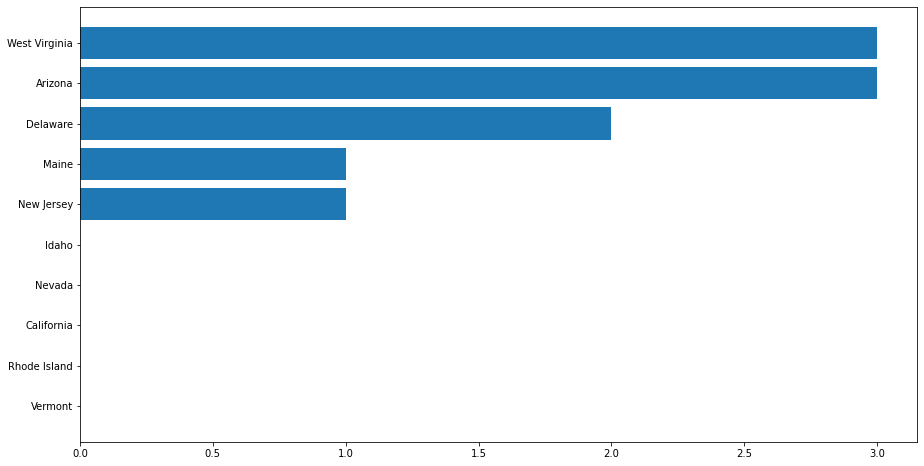

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['fat'])

In [52]:
colors = dict(zip(
    ['South', 'West', 'North',
     'Midwest'],
    ['#ffb3ff', '#90d595', '#e48381',
     '#aafbff']
))
group_lk = df.set_index('name')['group'].to_dict()

Text(1, 0.4, '2019')

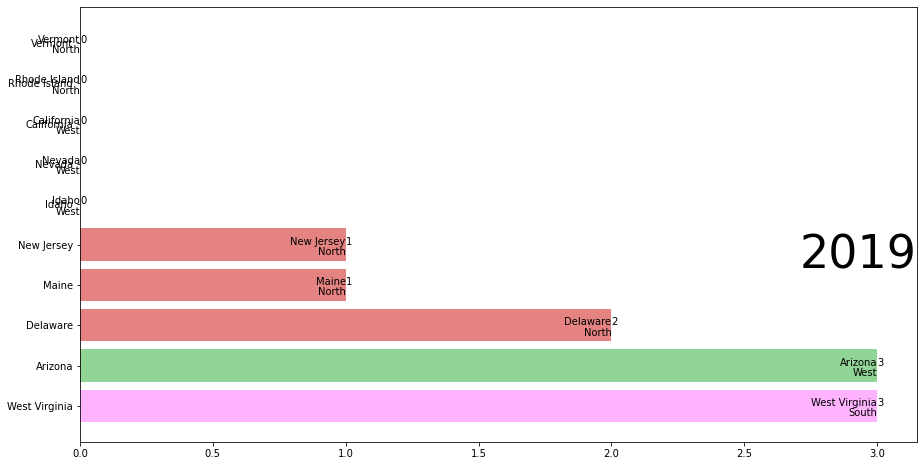

In [53]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['fat'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values 
for i, (value, name) in enumerate(zip(dff['fat'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  
    ax.text(value, i-.25, group_lk[name],  ha='right')  
    ax.text(value, i,     value,           ha='left')   
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

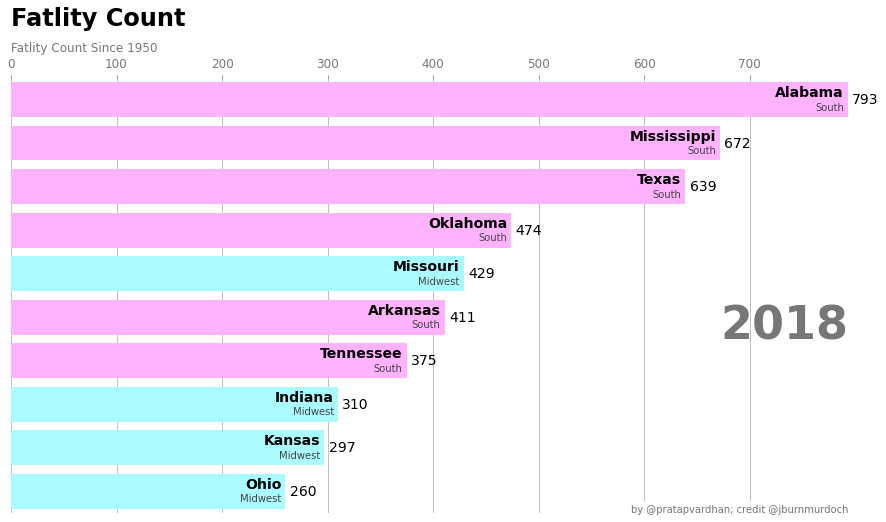

In [54]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = test[test['year'].eq(year)].sort_values(by='fat', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['fat'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['fat'].max() / 200
    for i, (value, name) in enumerate(zip(dff['fat'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Fatlity Count Since 1950', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Fatlity Count',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

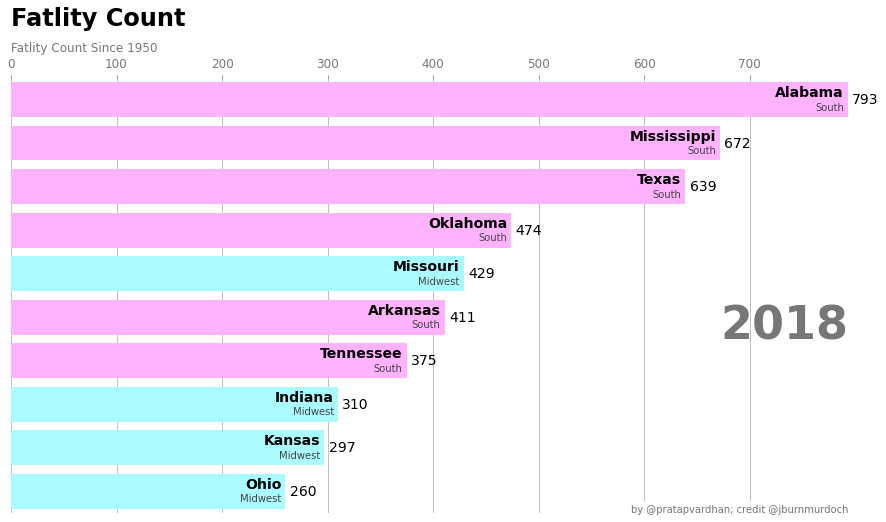

In [55]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1950, 2019))
HTML(animator.to_jshtml())

In [56]:
test['name']=test['name'].replace({
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'})
test

name  year  fat
0      AL  1950    0
1      AR  1950    2
2      CO  1950    0
3      CT  1950    0
4      FL  1950    0
...   ...   ...  ...
2977   VA  2019   38
2978   WA  2019    6
2979   WV  2019    3
2980   WI  2019  102
2981   WY  2019    4

[2982 rows x 3 columns]

In [24]:

maps = px.choropleth(test, 
              locations = 'name',
              color="fat", 
              animation_frame="year",
              color_continuous_scale="sunset",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 800),
              title='Tornado Fatalities 1950-2019',
              height=600
             )

In [57]:
# maps

In [58]:
maps.write_html("fatalities_map.html")